<a href="https://colab.research.google.com/github/swaroop-raj/machine-learning/blob/main/Term_Deposit_Subscription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement (Term Deposit Sale)


---


We have data from a Portuguese bank on details of customers related to selling a term deposit. The objective of the project is to help the marketing team identify potential customers who are relatively more likely to subscribe to the term deposit and this increase the hit ratio.


### What is a Term Deposit?
A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

 

### Resources Available

The historical data for this project is available in file https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

 

### Deliverable –1 (Exploratory data analysis)–(15)

**Univariate analysis (9marks)**
* Data types and description of the independent attributes which should include (name,  range of values observed, central values (mean and median), standard deviation and quartiles, skewness). - 3 Marks
* Make a function to plot ‘countplot’ if the variable is categorical and ‘distplot’ if the variable is numeric. - 3 Marks
* Identify outliers using IQR and verify the same using plots. Also mention the percentage of data points which are considered outliers. Should we treat them, why or why not? - 3 Marks

**Multivariate analysis (6marks)**
* Make a function to plot boxplots for all continuous variables VS ‘Target’ variable and countplots for all categorical variables VS ‘Target’ variable? - 3 Marks
* Bi-variate analysis between predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using pair plots, heatmaps, histograms or density curves. - 3 Marks
 

### Deliverable –2 (Prepare the data for analytics)–(5)

* Label encode or create dummy variables for categorical variables. Give reason for selecting either of them. - 2 Marks
* Create the training set and test set in a ratio of 70:30. Make sure and verify distribution of classes is the same in the full dataset and train test split data. - 3 Marks
 

### Deliverable –3 (Create the ensemble model)–(30)

* Build the ensemble models (Bagging and Boosting) and Decision Tree model (at least 4 models in total). Note the model performance by using different metrics. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. - 10 Marks
* Also reflect the training and testing score of all the models. Build a dataframe with model names as row index and all the metrics calculated as columns - 5 Marks
* Explain the confusion matrix related terms like recall, precision etc. Also, select the best metric to choose one of the models from above. Give your reason for the same. - 5 Marks
* Answer the following questions : - 10 Marks
What do you mean by recall and what information does it provide here?
* Suggest some changes for the organization so that they can increase the number of customers who take term deposit.
* How much influence does the previous campaign and mode of interaction have on financial performance.
* Which features should be more/less focused by the bank to get better results and why?
* What did you learn about banking industries from this data?
 

** Note : ** Use random_state=7 (wherever the parameter can be used) so that we can compare all submissions.

## Attribute Information

1. age
2. job : type of job
3. marital : marital status
4. education
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign
17. Output variable ('Target'): has the client subscribed a term deposit?

## <a id = "link1"></a> Import Libraries and Load Dataset

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Importing the libraries for ploting
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#importing train test split from sklearn for preraing traing and test dataset for the logistic model

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

**Reading the dataset:**

In [81]:
df = pd.read_csv('/content/bank-full.csv');
data = df.copy()

## <a id = "link2"></a> Deliverable –1 (Exploratory data analysis)

In [82]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [83]:
# No of rows and columns
data.shape

(45211, 17)

Dataset has 45211 rows and 17 feature attributes.

**Null checks the dataset:**

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [85]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

There are no NAN or null values in the dataset . However there are some unknown or missing data which we will be treating going forward.

 **Unique values counts and domain values**

In [86]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [87]:
# Unique domain values in the categorial column
print(data['contact'].value_counts())
print()
print(data['marital'].value_counts())
print()
print(data['education'].value_counts())
print()
print(data['month'].value_counts())
print()
print(data['poutcome'].value_counts())

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


 **Insights:**
- `For many customers there is unknown contact communication channel.`
- `Q2 has the most amount of contacts to customers , May being the busiest month for the campaining team`
- `Previous Outcome (poutcome) has many other and unknown values.We shall investigate more on data and see if we can categorize these values to nonexistent category.`

In [88]:
data['poutcome'] = data['poutcome'].replace(['other' , 'unknown'], 'nonexistent')

# converting other and unknown category to nonexistent category.

data['poutcome'].value_counts()

nonexistent    38799
failure         4901
success         1511
Name: poutcome, dtype: int64

### <a id = "link8"></a> Univariate Analysis

In [89]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

**Insights:**
- `The attributes which are of data type object have fixed domain values. We would be changing the data types for these to category types`

**Statistical description of the data set**

In [90]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


**Function to plot the plots based on data types**

In [91]:
def univariatePlots(data) :
  for col in data.columns :
    if (data[col].dtypes == "int64") :
      print("Distplot for numeric column : " , col);
      sns.displot(data[col], kde=True);
    elif data[col].dtypes == "object" :
      print("Countplot for categorical column : " , col);
      sns.countplot(data[col]);
    plt.show()


Distplot for numeric column :  age


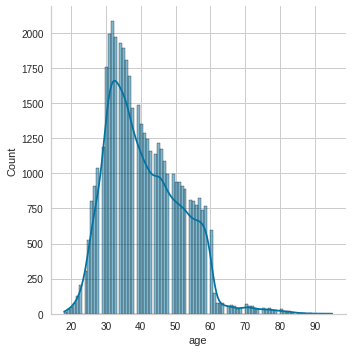

Countplot for categorical column :  job


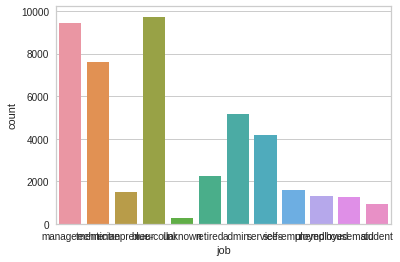

Countplot for categorical column :  marital


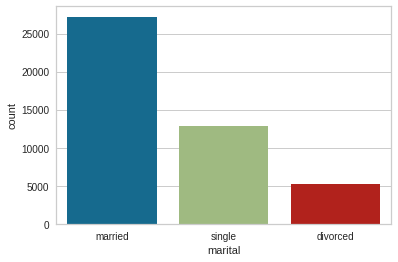

Countplot for categorical column :  education


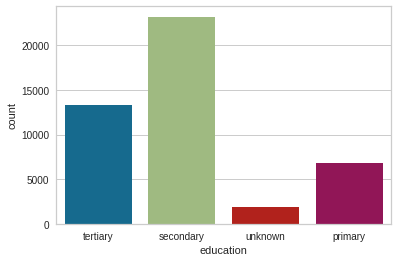

Countplot for categorical column :  default


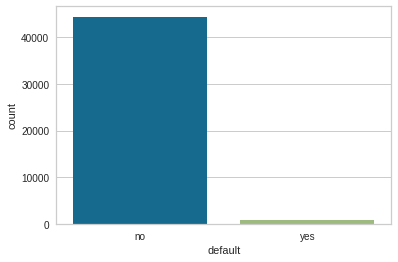

Distplot for numeric column :  balance


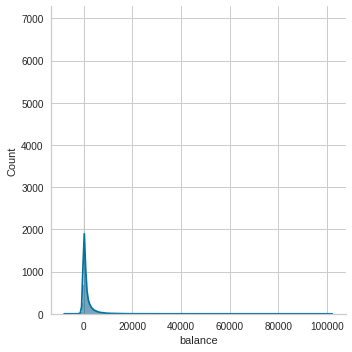

Countplot for categorical column :  housing


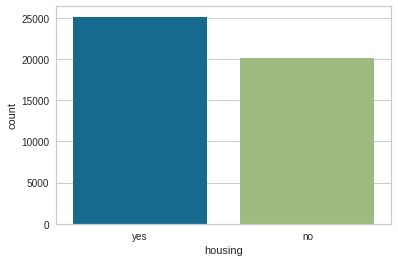

Countplot for categorical column :  loan


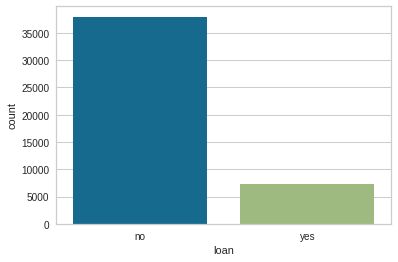

Countplot for categorical column :  contact


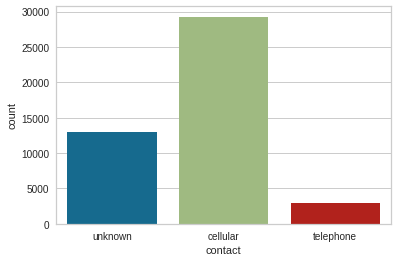

Distplot for numeric column :  day


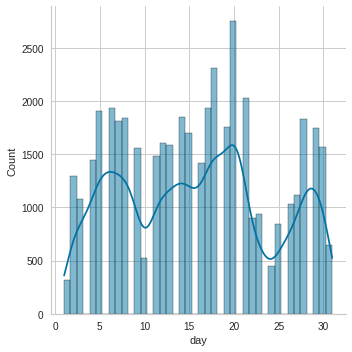

Countplot for categorical column :  month


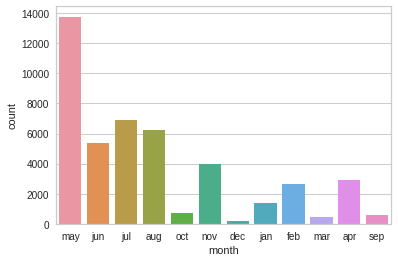

Distplot for numeric column :  duration


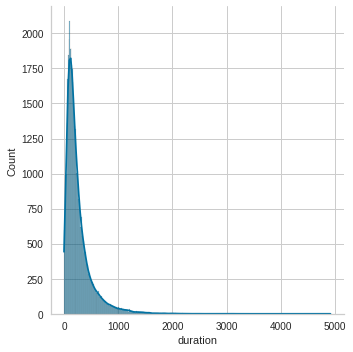

Distplot for numeric column :  campaign


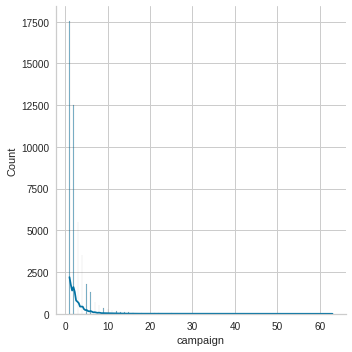

Distplot for numeric column :  pdays


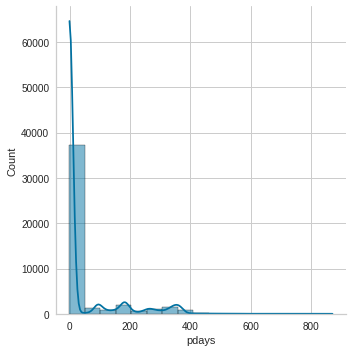

Distplot for numeric column :  previous


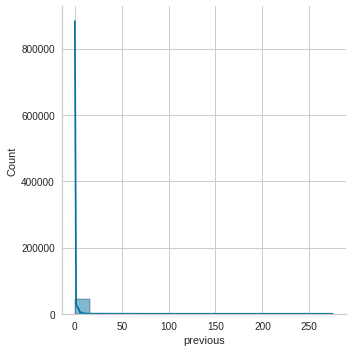

Countplot for categorical column :  poutcome


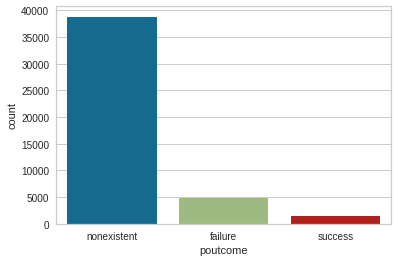

Countplot for categorical column :  Target


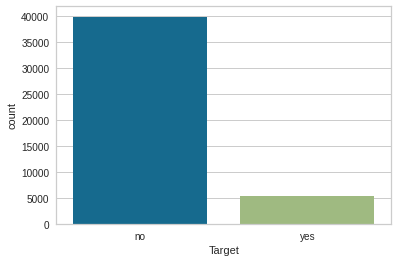

In [92]:
univariatePlots(data)

In [93]:
for col in data.columns :
  if data[col].dtypes == 'object' :
    print(data[col].value_counts(normalize = 'columns'))
    print("--------------------------------------------")

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64
--------------------------------------------
married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64
--------------------------------------------
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64
--------------------------------------------
no     0.981973
yes    0.018027
Name: default, dtype: float64
--------------------------------------------
yes    0.555838
no     0.444162
Name: housing, dtype: float64
--------------------------------------------
no     0.839774
yes    0.160226
Name: loan, dtype: float64
-----------------------------------------

**Insights:**
- `The dataset has customers from various age groups. 30 - 40 years being the most common age group`
- `Majority of people are married ( 60% married)`
- `Majority of people are non defaulters (98%)`
- `Majority of people donot have loans with the bank`
- `Majority of the people have not subscribed to Term deposit from previous campains`
- `Q2 has the most amount of contacts to customers , May being the busiest month for the campaining team . May has 30% of contact volumes`
- `Majority of the customer have not subscribed to Term Deposit. Only 11.6% of target attribute has values as "yes".`

Statistical description of the data

In [94]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [95]:
# function to calculate the IQR and upper and lower bound range
def calculateIQR(col) :
  Q1 = np.percentile(col, 25, interpolation='midpoint')
  Q3 = np.percentile(col, 75, interpolation='midpoint')
  IQR = Q3-Q1
  lower_bound = Q1 -(1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)
  return lower_bound, upper_bound 

Count of upper and lower range outliers and percenrage 

In [96]:
print("Outliers details for the dataset :")
for col in data.columns :
  if data[col].dtypes == 'int64' :
    lower_range, upper_range = calculateIQR(data[col])
    print("---------------- " + col +  "--------------------------------------------")
    print("Count of upper-range outliers - ", data[data[col] > upper_range].shape[0])
    print("Percentage of upper-range outliers - ", (data[data[col] > upper_range].shape[0] / data.shape[0])* 100)
    print("Count of lower-range outliers - ", data[data[col] < lower_range].shape[0])
    print("Percentage of lower-range outliers - ", (data[data[col] < lower_range].shape[0] / data.shape[0]) * 100)
    print("---------------------------------------------------------------------")

Outliers details for the dataset :
---------------- age--------------------------------------------
Count of upper-range outliers -  487
Percentage of upper-range outliers -  1.0771714848156422
Count of lower-range outliers -  0
Percentage of lower-range outliers -  0.0
---------------------------------------------------------------------
---------------- balance--------------------------------------------
Count of upper-range outliers -  4712
Percentage of upper-range outliers -  10.42224237464334
Count of lower-range outliers -  17
Percentage of lower-range outliers -  0.03760146866912919
---------------------------------------------------------------------
---------------- day--------------------------------------------
Count of upper-range outliers -  0
Percentage of upper-range outliers -  0.0
Count of lower-range outliers -  0
Percentage of lower-range outliers -  0.0
---------------------------------------------------------------------
---------------- duration------------------

**Insights:**
- `The data set has multiple outliers as calculated above and same can be seen in below box plots`
- `**balance** - This feature has 10% upper range outliers and multiple negative balances. We shall treat these in either of below two ways and gauge which approach contributes more towards the model prediction :`
     - `make negative balances to zero values`
     - `Categorize the balance to multiple ranges , negative , 0 - 10000 and more than 10000`
- `**pdays** - This has many values as -1 . It is a good chance -1 represented as no contact . So we shall be converting -1 to 0's`
- `**previous** - This has outliers however it seems some of these outliers have resulted in a term deposit subscription. Hence we shall keep these and see any corelation with target variable.`



Box plot to represent the IQR and outliers for the attributes

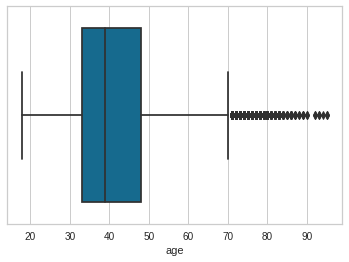

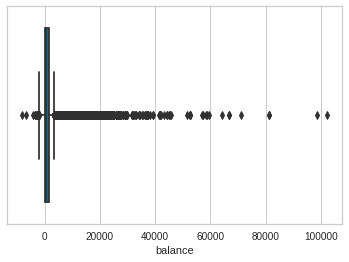

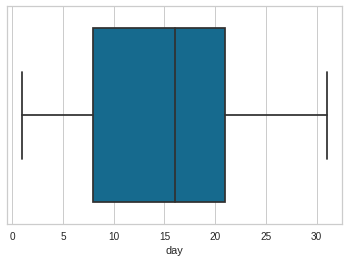

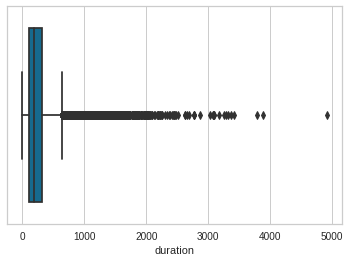

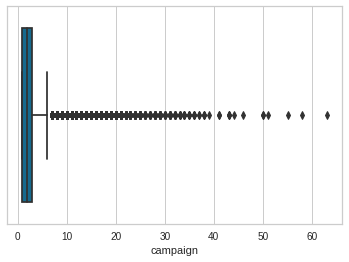

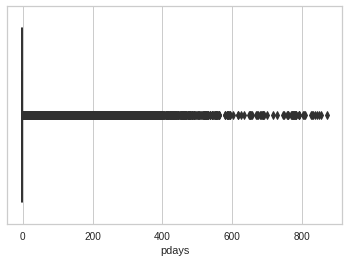

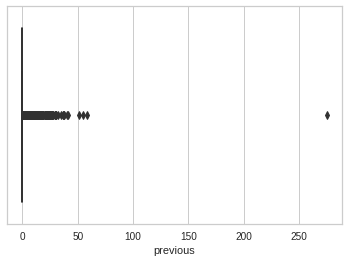

In [97]:
for col in data.columns :
    if (data[col].dtypes == "int64") :
      sns.boxplot(data[col] , orient="h")
      plt.show()

### <a id = "link10"></a> Bivariate & Multivariate Analysis

In [98]:
# function to plot the boxplot and countplot against the target variable accordingly 
def multiVariate(data) :
  for col in data.columns :
    if data[col].dtypes == 'int64' :
      showBoxPlot(col)
  for col in data.columns :
    if data[col].dtypes == 'object' :
      showCountPlot(col)

def showBoxPlot(col) :
   print("Box-Plot for attribute "+ col + " against target attribute")
   sns.boxplot(x=data[col] , y=data['Target'], data=data)
   plt.show()

def showCountPlot(col) :
  print("Count-Plot for attribute "+ col + " against target attribute")
  sns.countplot(x=data[col], hue='Target', data=data)
  plt.show()

Box-Plot for attribute age against target attribute


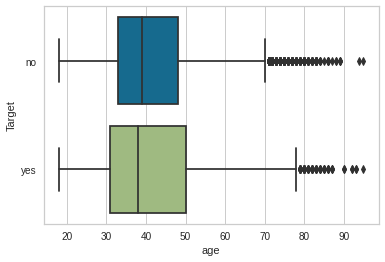

Box-Plot for attribute balance against target attribute


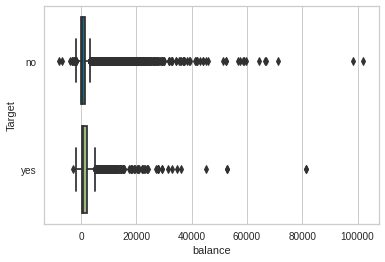

Box-Plot for attribute day against target attribute


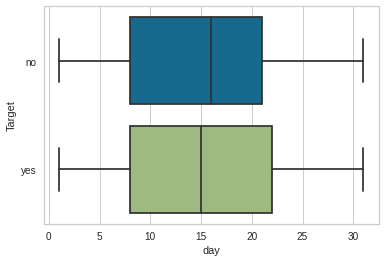

Box-Plot for attribute duration against target attribute


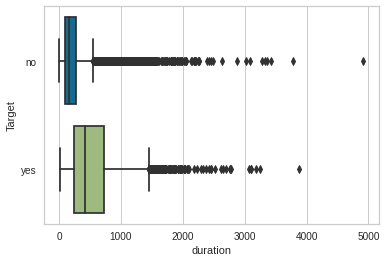

Box-Plot for attribute campaign against target attribute


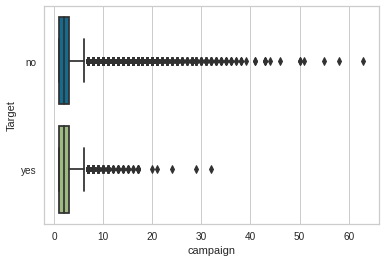

Box-Plot for attribute pdays against target attribute


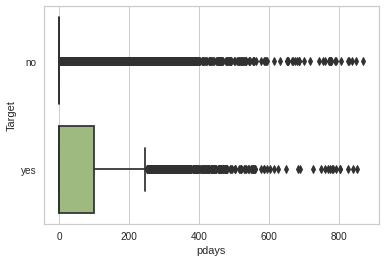

Box-Plot for attribute previous against target attribute


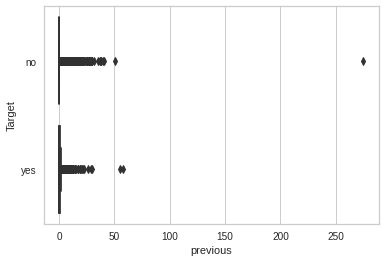

Count-Plot for attribute job against target attribute


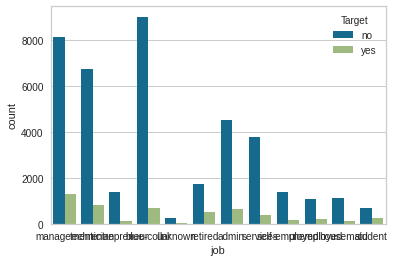

Count-Plot for attribute marital against target attribute


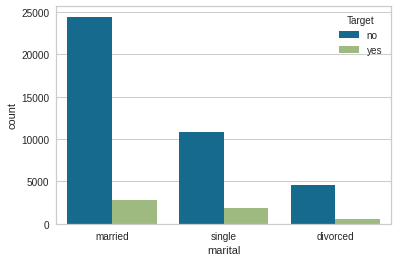

Count-Plot for attribute education against target attribute


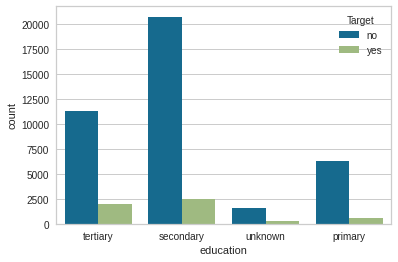

Count-Plot for attribute default against target attribute


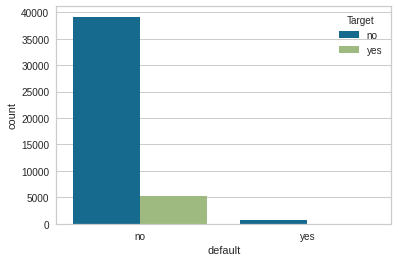

Count-Plot for attribute housing against target attribute


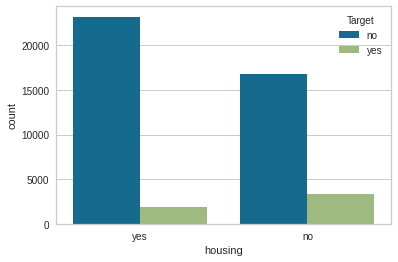

Count-Plot for attribute loan against target attribute


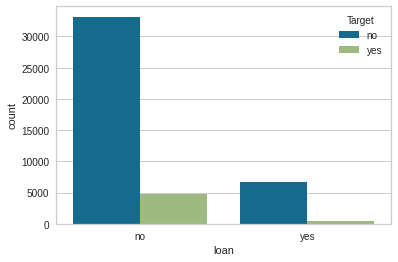

Count-Plot for attribute contact against target attribute


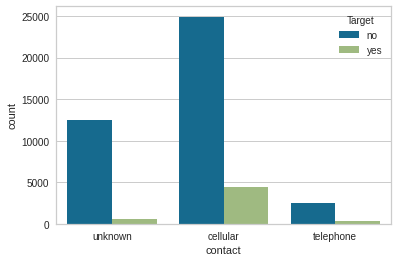

Count-Plot for attribute month against target attribute


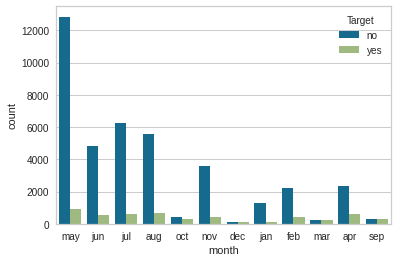

Count-Plot for attribute poutcome against target attribute


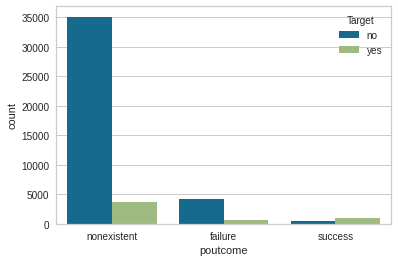

Count-Plot for attribute Target against target attribute


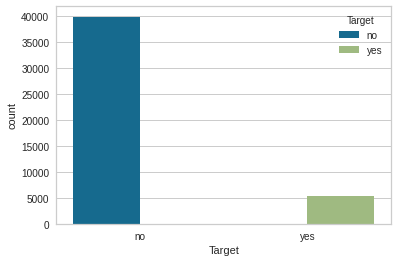

In [99]:
multiVariate(data)

Pair plot to show the corelation beetween the continuous attributes

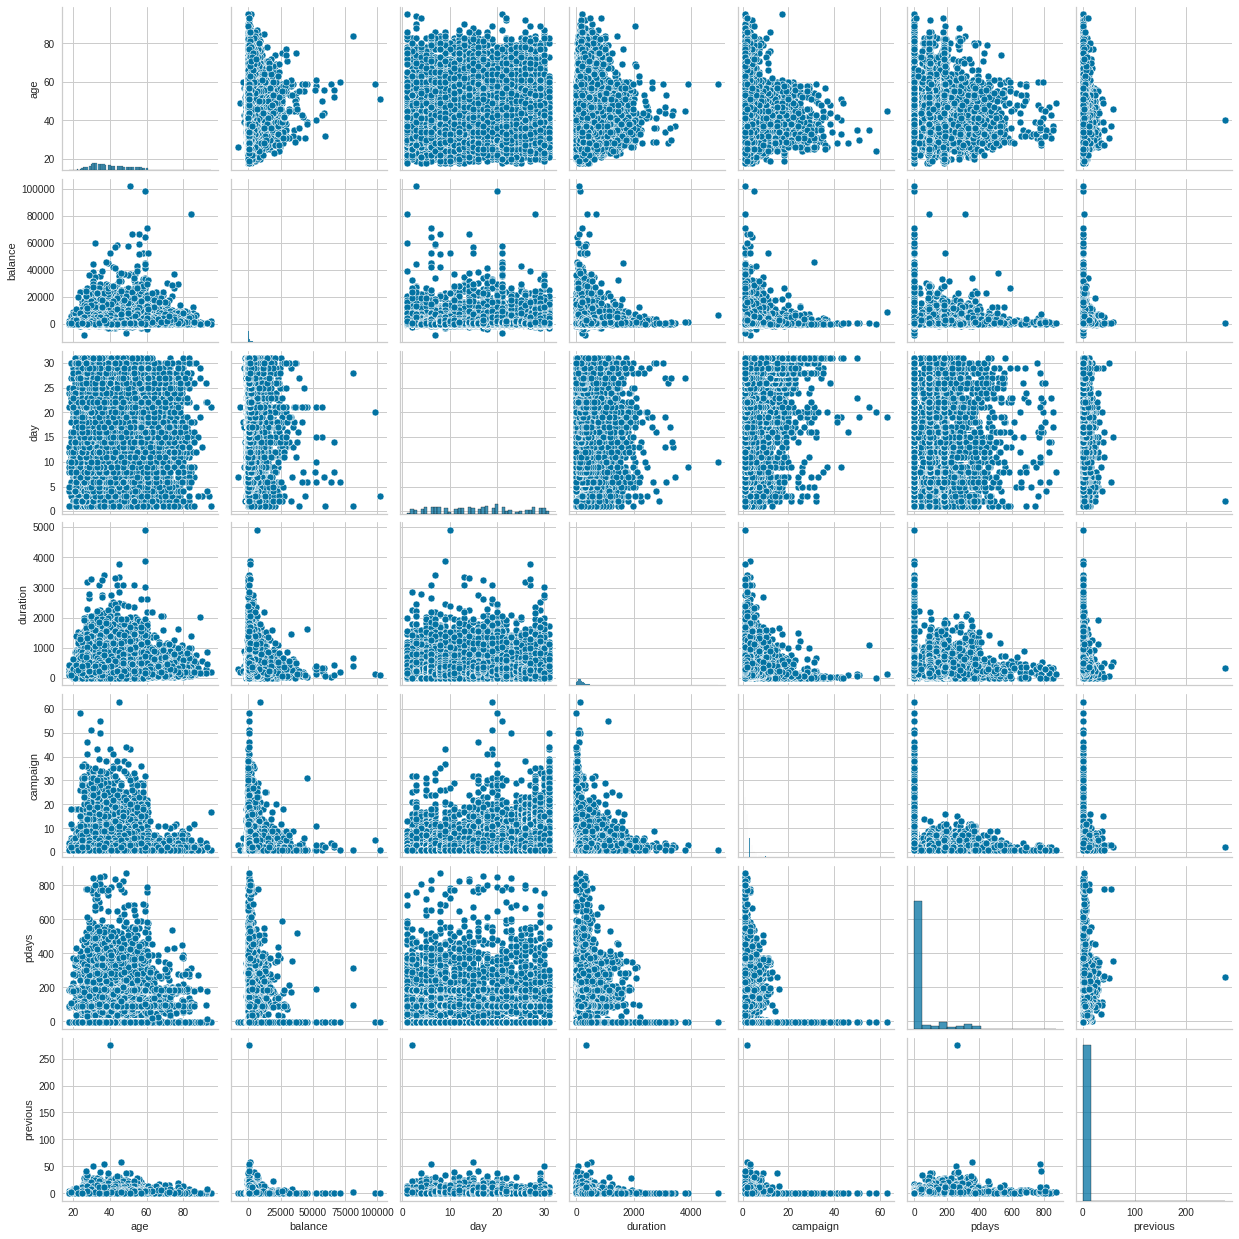

In [100]:
sns.pairplot(data)
plt.show()

Comparing the features against the Traget variable

In [101]:
pd.crosstab(data['Target'], data['poutcome'],normalize='columns')

# poutcome with "success" has most customers subscribed to term deposit ( target -> yes ).

poutcome,failure,nonexistent,success
Target,,,
no,0.873903,0.904817,0.352747
yes,0.126097,0.095183,0.647253


In [102]:
pd.crosstab(data['Target'], data['loan'],normalize='columns')

loan,no,yes
Target,,
no,0.873443,0.933186
yes,0.126557,0.066814


In [103]:
pd.crosstab(data['Target'], data['default'],normalize='columns')

default,no,yes
Target,,
no,0.882039,0.936196
yes,0.117961,0.063804


In [104]:
pd.crosstab(data['Target'], data['education'],normalize='columns')

education,primary,secondary,tertiary,unknown
Target,,,,
no,0.913735,0.894406,0.849936,0.864297
yes,0.086265,0.105594,0.150064,0.135703


- `Education has unknown values which has a fair amount of distribution for customer who took term deposits.Hence we cannot delete unknown values for edication`
- `We would be replacing unknown with the most occuring education category (mode) , i.e secondary`

In [105]:
# Replacing "unknown" with most mode of eduation ( secondary)

most_freq_category = data['education'].mode()[0]
data['education'] = data['education'].replace(['unknown'],most_freq_category)
print("After data conversion")
pd.crosstab(data['Target'], data['education'],normalize='columns')

After data conversion


education,primary,secondary,tertiary
Target,,,
no,0.913735,0.892174,0.849936
yes,0.086265,0.107826,0.150064


In [106]:
pd.crosstab(data['Target'], data['contact'],normalize='columns')

contact,cellular,telephone,unknown
Target,,,
no,0.850811,0.865795,0.959293
yes,0.149189,0.134205,0.040707


In [107]:
pd.crosstab(data['Target'], data['month'],normalize='columns')

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
Target,,,,,,,,,,,,
no,0.803206,0.889867,0.53271,0.833522,0.898788,0.909065,0.897772,0.480084,0.932805,0.898489,0.562331,0.535406
yes,0.196794,0.110133,0.46729,0.166478,0.101212,0.090935,0.102228,0.519916,0.067195,0.101511,0.437669,0.464594


In [108]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

dis plot and histograms for continuous attributes against target attribute.

In [109]:
# function to show the distribution of continious attributes agaisnt the target attribute (Yes/No)
def showContDisPlot (col) :
  sns.distplot(data[data['Target']=='yes'][col],color='g',label='Yes')
  sns.distplot(data[data['Target']=='no'][col],color='r',label='No')
  plt.legend()
  plt.show()

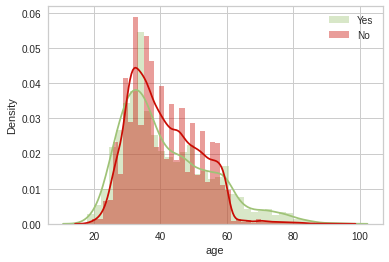

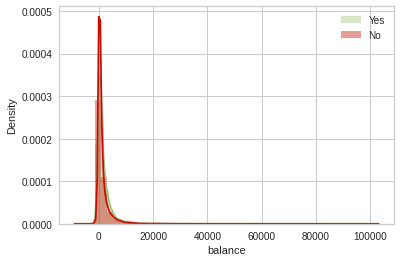

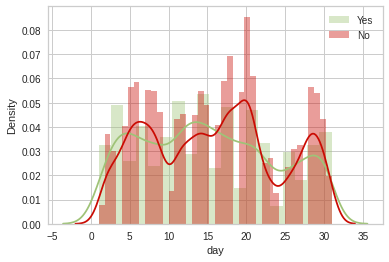

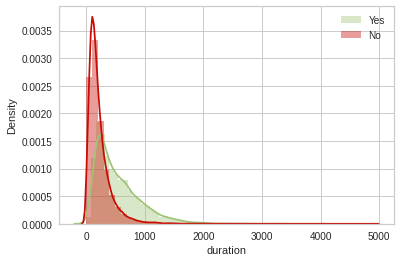

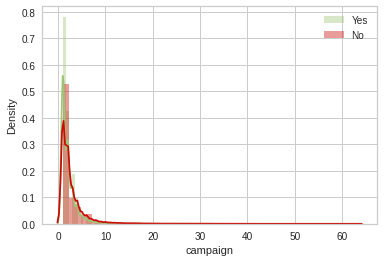

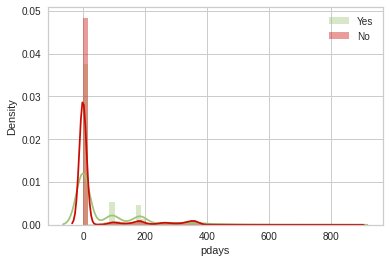

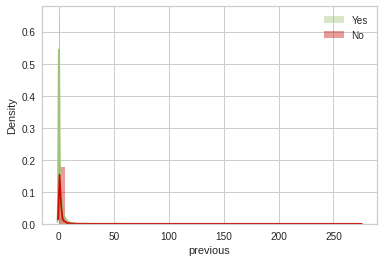

In [110]:
for col in data.columns :
  if data[col].dtypes == 'int64' :
    showContDisPlot(col)

Heatmap for the correlation

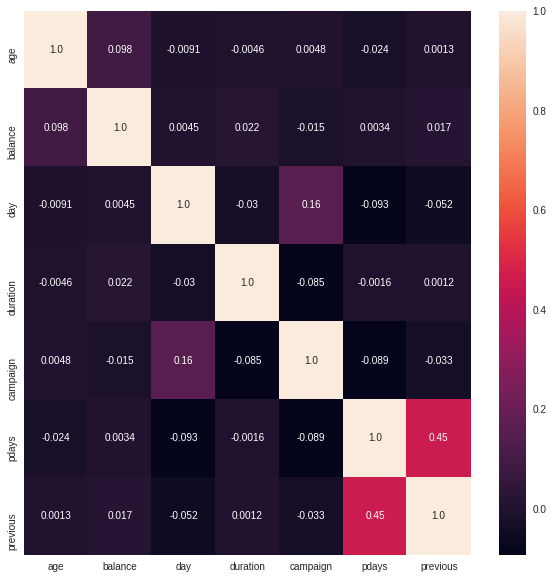

In [111]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt=".2")
plt.show()

**Insights**
- `Mostly all the attributes are independent of each other and less correlation`
- `pdays and previous having the max coreleartion of 0.45 , so we can keep all of them.`

## Deliverable –2 (Prepare the data for analytics)


In [112]:
# converting balance to range so that we can treat negative values and few outliers as category

bal_category = pd.cut(data.balance,bins=[-10000,0,5000,100000,9999999999],labels=['Negative','0-5k','5k-100k','above 100k'])
data.insert(5,'balance group',bal_category)


In [113]:
# droppinig balance column , since its converted to balance group category

data = data.drop('balance' , axis=1)
data.head()


,age,job,marital,education,default,balance group,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,0-5k,yes,no,unknown,5,may,261,1,-1,0,nonexistent,no
1,44,technician,single,secondary,no,0-5k,yes,no,unknown,5,may,151,1,-1,0,nonexistent,no
2,33,entrepreneur,married,secondary,no,0-5k,yes,yes,unknown,5,may,76,1,-1,0,nonexistent,no
3,47,blue-collar,married,secondary,no,0-5k,yes,no,unknown,5,may,92,1,-1,0,nonexistent,no
4,33,unknown,single,secondary,no,0-5k,no,no,unknown,5,may,198,1,-1,0,nonexistent,no


Converting objects to category data types

In [114]:
# Convert the attributes with data types as object to categorical types

for col in data.columns :
  if data[col].dtypes == 'object' :
    data[col] = data[col].astype('category')

data.dtypes


age                 int64
job              category
marital          category
education        category
default          category
balance group    category
housing          category
loan             category
contact          category
day                 int64
month            category
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome         category
Target           category
dtype: object

In [115]:
# Spliting the data in x and y , having Target attribute only in y and x having rest attributes.

x = data.drop('Target', axis=1)
y = data['Target']


One Hot Encoding for categorical attributes

In [116]:
print("Shape before encoding " , x.shape)
x = pd.get_dummies(x);
print("Shape after encoding " , x.shape)

Shape before encoding  (45211, 16)
Shape after encoding  (45211, 52)


In [117]:
print("Before conversion")
print(y.dtypes)
print(y.value_counts())

Before conversion
category
no     39922
yes     5289
Name: Target, dtype: int64


In [118]:
# converting target attribute to binary values for better ingestion to scoring metrics 

y = y.replace(['yes'],1)
y = y.replace(['no'],0)
print("After conversion")
print(y.dtypes)
print(y.value_counts())

After conversion
category
0    39922
1     5289
Name: Target, dtype: int64


### <a id = "link12"></a> Split the data into training and test set in the ratio of 70:30 respectively

In [119]:
#importing train test split from sklearn for preraing traing and test dataset for the logistic model

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=7)

Distribution of the train and test data for the target variable

In [120]:
print("Distribution of target variable in original data")
print(data['Target'].value_counts(normalize=True))
print()
print("Distribution of target variable in training data")
print(y_train.value_counts(normalize=True))
print()
print("Distribution of target variable in original data")
print(y_test.value_counts(normalize=True))

Distribution of target variable in original data
no     0.883015
yes    0.116985
Name: Target, dtype: float64

Distribution of target variable in training data
0    0.881347
1    0.118653
Name: Target, dtype: float64

Distribution of target variable in original data
0    0.886907
1    0.113093
Name: Target, dtype: float64


**Note**
- `The distribution of yes / no values for target attribute is preserved across the training and test data set`

## Deliverable –3 (Create the ensemble model)



#### <a id = "link11"></a> Model building using Decision Tree Classifier from sklearn

In [121]:
# importing the sklearn packages
from sklearn.tree import DecisionTreeClassifier 

dTree = DecisionTreeClassifier(criterion ='entropy')

In [122]:
dTree.fit(x_train, y_train)
print("Max Depth of Tree " , dTree.get_depth())
print("Score on train data " , dTree.score(x_train, y_train))
print("Score on test data " , dTree.score(x_test, y_test))

Max Depth of Tree  40
Score on train data  1.0
Score on test data  0.8793128870539664


**Note** 
- `The defaut decision tree is a overfit and we are going to prune this limiting the max depths`

### <a id = "link17"></a> Coefficients and Feature importances of the attrbutes

In [123]:
features = [col for col in x_train.columns if col != 'Target']

feat_imp_dict = dict(zip(features, dTree.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.301350
age,0.101482
day,0.098346
poutcome_success,0.089755
pdays,0.043547
campaign,0.034465
contact_unknown,0.034457
housing_no,0.022216
month_aug,0.015166
previous,0.014544


**Insights**
- `duration , age, day, month , poutcome , balance seems to be the most important features that contribute to the predictions`

In [124]:
# pruning the decision tree clasifier with max depth limitations to avoid overfitting 

dTree_pruned = DecisionTreeClassifier(criterion='gini' , max_depth=4)
dTree_pruned.fit(x_train, y_train)
print("Max Depth of Tree " , dTree_pruned.get_depth())
print("Score on train data " , dTree_pruned.score(x_train, y_train))
print("Score on test data " , dTree_pruned.score(x_test, y_test))

Max Depth of Tree  4
Score on train data  0.9010648718677916
Score on test data  0.9027572987319374


Metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score)

In [125]:
# importing the scoring metrics from sklearn
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from IPython.display import display, HTML

# function to print all scoring metrics for the model
def getScores(model, x_train, y_train, x_test, y_test, pred) :
  tempRes = pd.DataFrame(columns = ['Model Type', 'Accuracy', 'Recall', 'Precision', 'F1', 'ROC AUC'])
  print("Model Type : ", type(model).__name__)
  print()
  print("Training data score Accuracy : ",model.score(x_train, y_train))
  print()
  print("Test data score Accuracy : ",model.score(x_test, y_test))
  print()
  accuracy = accuracy_score(y_test, pred)
  print("Accuracy Score : ", accuracy)
  print()
  recall = recall_score(y_test, pred)
  print("Recall Score : ", recall)
  print()
  precision = precision_score(y_test, pred)
  print("Precision Score : ", precision)
  print()
  f1 = f1_score(y_test, pred)
  print("F1 Score : ", f1)
  print()
  rocauc = roc_auc_score(y_test, pred)
  print("ROC AUC Score : ", rocauc)
  tempRes = tempRes.append({'Model Type' : type(model).__name__, 'Accuracy' : accuracy, 
                                      'Recall' : recall, 'Precision' : precision, 'F1' : f1, 'ROC AUC' : rocauc},  
                ignore_index = True)
  return tempRes

In [126]:
modelResults = pd.DataFrame()
dTree_pred = dTree_pruned.predict(x_test)
tempRes = getScores(dTree_pruned, x_train, y_train, x_test, y_test, dTree_pred)
print()
modelResults = pd.concat([modelResults, tempRes])
modelResults


Model Type :  DecisionTreeClassifier

Training data score Accuracy :  0.9010648718677916

Test data score Accuracy :  0.9027572987319374

Accuracy Score :  0.9027572987319374

Recall Score :  0.33376792698826596

Precision Score :  0.6328800988875154

F1 Score :  0.4370465215535638

ROC AUC Score :  0.6545398238432603



,Model Type,Accuracy,Recall,Precision,F1,ROC AUC
0,DecisionTreeClassifier,0.902757,0.333768,0.63288,0.437047,0.65454


### <a id = "link15"></a> Heatmap to display confusion matrix 

In [127]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix, classification_report

def confusion_martix (y_test, y_predict) : 
  cf_matrix = confusion_matrix(y_test, y_predict)
  sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

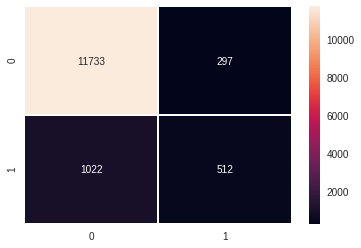

In [128]:
confusion_martix(y_test, dTree_pred)

### <a id = "link16"></a> Graph to show the ROC Curve

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c4c68f1d0>,
       classes=None, macro=True, micro=True, model=None, per_class=True)

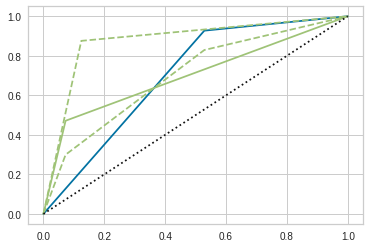

In [129]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

roc = ROCAUC(DecisionTreeClassifier())
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc

Graphical representation of the Decision Tree Classifier

In [130]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

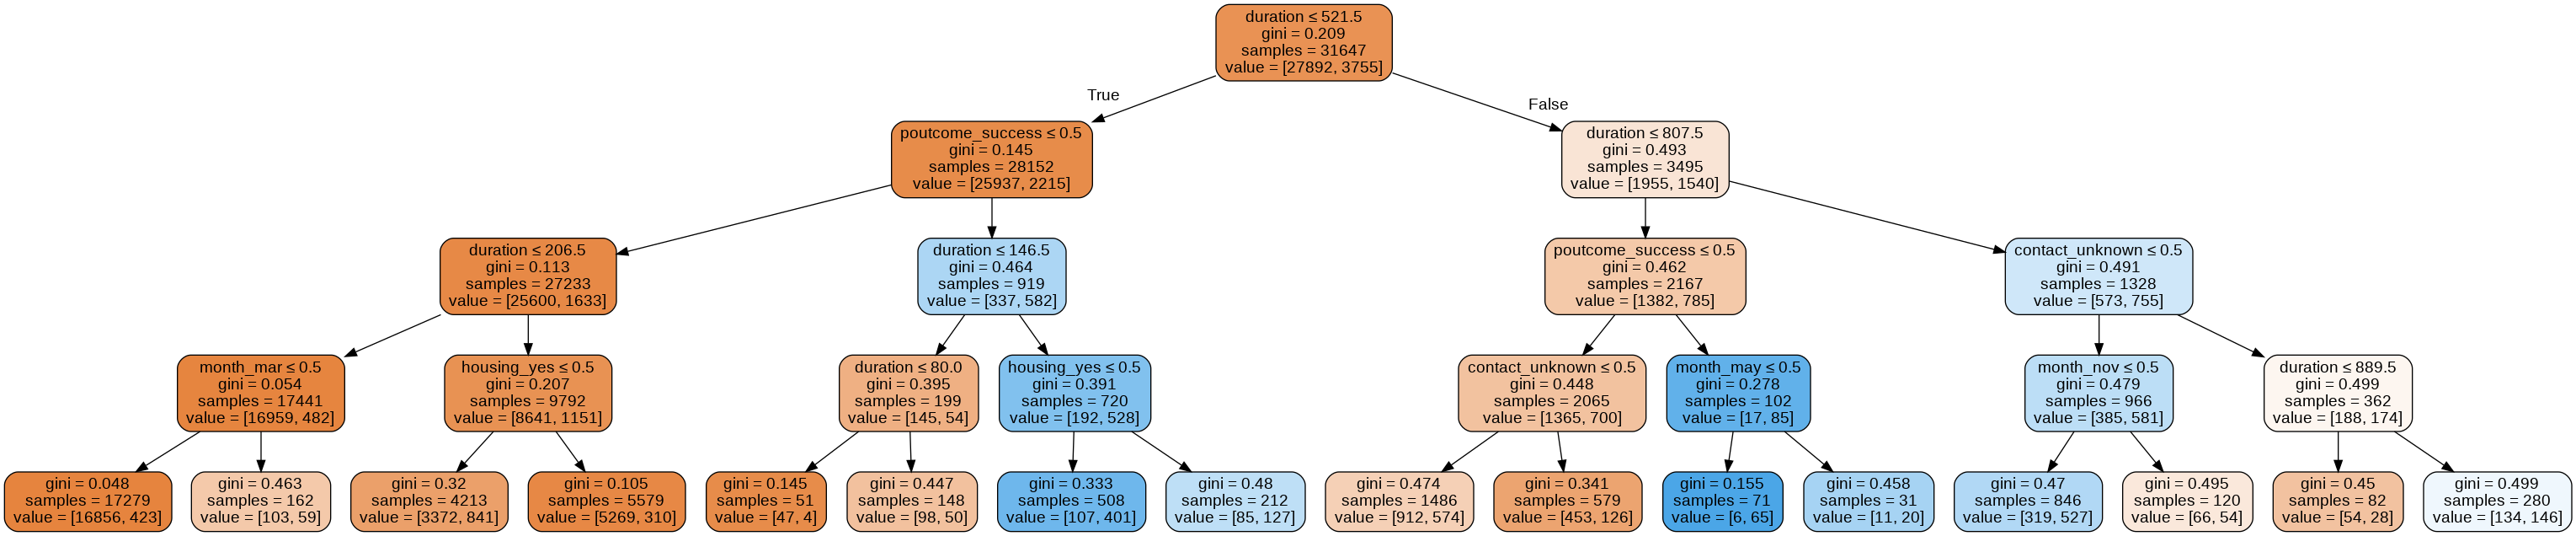

In [131]:
features = [col for col in x_train.columns]

dot_data = StringIO()
export_graphviz(dTree_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bank_data_pruned.png')
Image(graph.create_png())

## Ensemble Method - Random Forest 

In [132]:
# importing the sklearn packages
from sklearn.ensemble import RandomForestClassifier 

# creating the Random Forest Classifier with the appropriate hyper parameters
dTree_rf = RandomForestClassifier(n_estimators=150 , criterion='gini', max_features=35, min_samples_leaf=2)

In [133]:
# fitting the training data and predicting on test data 
dTree_rf.fit(x_train, y_train)
dTree_rf_pred = dTree_rf.predict(x_test)

Metrics related to evaluating the randon forest performance (accuracy, recall, precision, f1score, and roc_auc_score)

In [134]:
tempRes = getScores(dTree_rf, x_train, y_train, x_test, y_test, dTree_rf_pred)
modelResults = pd.concat([modelResults, tempRes])
print()
print("Comparision of all the models")
modelResults

Model Type :  RandomForestClassifier

Training data score Accuracy :  0.9887825070306823

Test data score Accuracy :  0.9082866411088174

Accuracy Score :  0.9082866411088174

Recall Score :  0.4876140808344198

Precision Score :  0.6202321724709784

F1 Score :  0.545985401459854

ROC AUC Score :  0.72477129644381

Comparision of all the models


,Model Type,Accuracy,Recall,Precision,F1,ROC AUC
0,DecisionTreeClassifier,0.902757,0.333768,0.632880,0.437047,0.654540
0,RandomForestClassifier,0.908287,0.487614,0.620232,0.545985,0.724771


**Insights**
- `Random Forest ensemble has a significant increase to the recall , f1 and roc auc scores`

Confusion Matrix for Random Forest

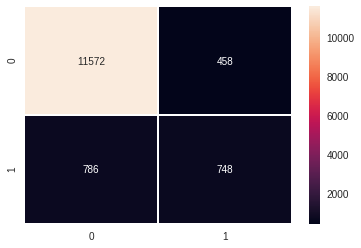

In [135]:
confusion_martix(y_test, dTree_rf_pred)

**Note**
- `Details and buisness insights of the confusion matrix is provided at the end of the notebook`



ROC AUC Curve for Random Forest


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c4e1db390>,
       classes=None, macro=True, micro=True, model=None, per_class=True)

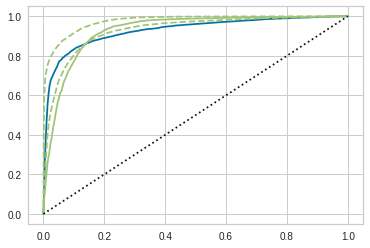

In [136]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

roc = ROCAUC(RandomForestClassifier(n_estimators = 150))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc

### Ensemble Method - Ada Boost


 

In [137]:
# importing the packages
from sklearn.ensemble import AdaBoostClassifier 

# creating the AdaBoostClassifier with appropriate hyperparametrs
dTree_adaboost = AdaBoostClassifier(n_estimators=200, learning_rate=0.1 , random_state=7)

# fitting the trainig data 
dTree_adaboost.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=200, random_state=7)

In [138]:
# predicting on test data
dTree_adaboost_pred = dTree_adaboost.predict(x_test)

Metrics related to evaluating the randon forest performance (accuracy, recall, precision, f1score, and roc_auc_score)

In [139]:
tempRes = getScores(dTree_adaboost, x_train, y_train, x_test, y_test, dTree_rf_pred)
modelResults = pd.concat([modelResults, tempRes])
print()
print("Comparision of all the models")
modelResults

Model Type :  AdaBoostClassifier

Training data score Accuracy :  0.8980946061238032

Test data score Accuracy :  0.9028310232969625

Accuracy Score :  0.9082866411088174

Recall Score :  0.4876140808344198

Precision Score :  0.6202321724709784

F1 Score :  0.545985401459854

ROC AUC Score :  0.72477129644381

Comparision of all the models


,Model Type,Accuracy,Recall,Precision,F1,ROC AUC
0,DecisionTreeClassifier,0.902757,0.333768,0.632880,0.437047,0.654540
0,RandomForestClassifier,0.908287,0.487614,0.620232,0.545985,0.724771
0,AdaBoostClassifier,0.908287,0.487614,0.620232,0.545985,0.724771


Confusion Matrix for Adaboost classifier

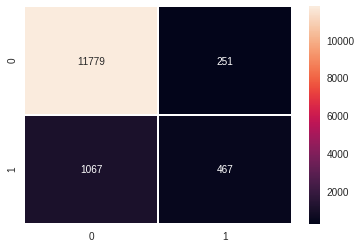

In [140]:
confusion_martix(y_test, dTree_adaboost_pred)

ROC AUC Curve for Ada Boosting

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c4e259f60>,
       classes=None, macro=True, micro=True, model=None, per_class=True)

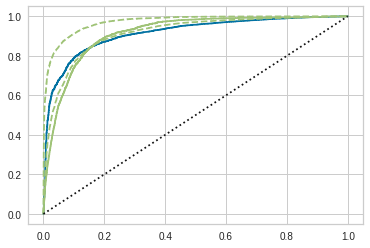

In [141]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

roc = ROCAUC(AdaBoostClassifier(n_estimators=200))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc

### Ensemble Method - Bagging Classifer

In [142]:
# importing the packages
from sklearn.ensemble import BaggingClassifier 

# creating BaggingClassifier with appropriate hyper parameters
dTree_bagging = BaggingClassifier(n_estimators=150, max_samples=0.7, oob_score=True, random_state=7)

# fitting the training data
dTree_bagging.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.7, n_estimators=150,
                  n_jobs=None, oob_score=True, random_state=7, verbose=0,
                  warm_start=False)

In [143]:
# predicting on test data
dTree_bagging_pred = dTree_bagging.predict(x_test)

Metrics related to evaluating the randon forest performance (accuracy, recall, precision, f1score, and roc_auc_score)

In [144]:
tempRes = getScores(dTree_bagging, x_train, y_train, x_test, y_test, dTree_bagging_pred)
modelResults = pd.concat([modelResults, tempRes])
print()
print("Comparision of all the models")
modelResults

Model Type :  BaggingClassifier

Training data score Accuracy :  0.9967769456820552

Test data score Accuracy :  0.9068121498083161

Accuracy Score :  0.9068121498083161

Recall Score :  0.48435462842242505

Precision Score :  0.6110197368421053

F1 Score :  0.5403636363636364

ROC AUC Score :  0.722518128841304

Comparision of all the models


,Model Type,Accuracy,Recall,Precision,F1,ROC AUC
0,DecisionTreeClassifier,0.902757,0.333768,0.632880,0.437047,0.654540
0,RandomForestClassifier,0.908287,0.487614,0.620232,0.545985,0.724771
0,AdaBoostClassifier,0.908287,0.487614,0.620232,0.545985,0.724771
0,BaggingClassifier,0.906812,0.484355,0.611020,0.540364,0.722518


Confusion Matrix for Bagging

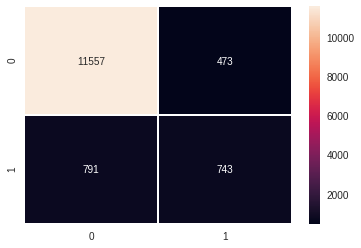

In [145]:
confusion_martix(y_test, dTree_bagging_pred)

ROC AUC Curve for Bagging Classifier


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c4c9c1390>,
       classes=None, macro=True, micro=True, model=None, per_class=True)

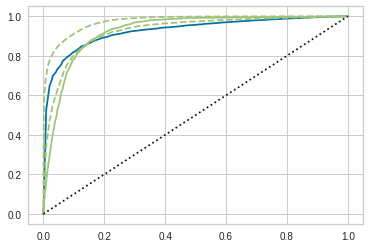

In [146]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

roc = ROCAUC(BaggingClassifier(n_estimators=150))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc

### Ensemble Method - Gradient Boosting Classifer

In [147]:
# importing the packages
from sklearn.ensemble import GradientBoostingClassifier

# creatinig GradientBoostingClassifier with appropriate hyper parameters
dTree_gradientboost = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=7)

# fitting the model on training data
dTree_gradientboost.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [148]:
# predicting the model on test data
dTree_gradientboost_pred = dTree_gradientboost.predict(x_test)

Metrics related to evaluating the randon forest performance (accuracy, recall, precision, f1score, and roc_auc_score)

In [149]:
tempRes = getScores(dTree_gradientboost, x_train, y_train, x_test, y_test, dTree_gradientboost_pred)
modelResults = pd.concat([modelResults, tempRes])
print()
print("Comparision of all the models")
modelResults

Model Type :  GradientBoostingClassifier

Training data score Accuracy :  0.9141782791417828

Test data score Accuracy :  0.9124152167502212

Accuracy Score :  0.9124152167502212

Recall Score :  0.4576271186440678

Precision Score :  0.6635160680529301

F1 Score :  0.5416666666666666

ROC AUC Score :  0.7140172168448935

Comparision of all the models


,Model Type,Accuracy,Recall,Precision,F1,ROC AUC
0,DecisionTreeClassifier,0.902757,0.333768,0.632880,0.437047,0.654540
0,RandomForestClassifier,0.908287,0.487614,0.620232,0.545985,0.724771
0,AdaBoostClassifier,0.908287,0.487614,0.620232,0.545985,0.724771
0,BaggingClassifier,0.906812,0.484355,0.611020,0.540364,0.722518
0,GradientBoostingClassifier,0.912415,0.457627,0.663516,0.541667,0.714017


Confusion Matrix for Gradient Boosting

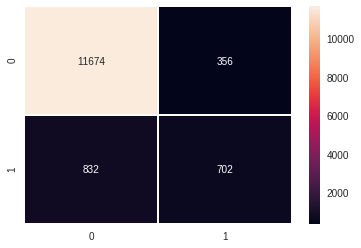

In [150]:
confusion_martix(y_test, dTree_gradientboost_pred)

ROC AUC Curve for Gradient Boosing

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c4eb409b0>,
       classes=None, macro=True, micro=True, model=None, per_class=True)

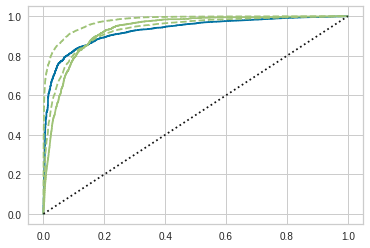

In [151]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

roc = ROCAUC(GradientBoostingClassifier(n_estimators=150))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc

### Ensemble Methods - XGBOOST

In [152]:
# importing the packages
from xgboost import XGBClassifier

# creating XGBClassifier with appropriate hyper parameters
xg_classifer = XGBClassifier(n_estimators=150, random_state=7, learning_rate=0.3 )

# fitting on training data
xg_classifer.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=7,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [153]:
# predicting on test data
xg_classifer_pred = xg_classifer.predict(x_test)

Metrics related to evaluating the randon forest performance (accuracy, recall, precision, f1score, and roc_auc_score)

In [154]:
tempRes = getScores(xg_classifer, x_train, y_train, x_test, y_test, xg_classifer_pred)
modelResults = pd.concat([modelResults, tempRes])
print()
print("Comparision of all the models")
modelResults

Model Type :  XGBClassifier

Training data score Accuracy :  0.9233102663759598

Test data score Accuracy :  0.9114567974048953

Accuracy Score :  0.9114567974048953

Recall Score :  0.4817470664928292

Precision Score :  0.645414847161572

F1 Score :  0.5516983949234789

ROC AUC Score :  0.7239990527809117

Comparision of all the models


,Model Type,Accuracy,Recall,Precision,F1,ROC AUC
0,DecisionTreeClassifier,0.902757,0.333768,0.632880,0.437047,0.654540
0,RandomForestClassifier,0.908287,0.487614,0.620232,0.545985,0.724771
0,AdaBoostClassifier,0.908287,0.487614,0.620232,0.545985,0.724771
0,BaggingClassifier,0.906812,0.484355,0.611020,0.540364,0.722518
0,GradientBoostingClassifier,0.912415,0.457627,0.663516,0.541667,0.714017
0,XGBClassifier,0.911457,0.481747,0.645415,0.551698,0.723999


Confusion Matrix on XG Boost 

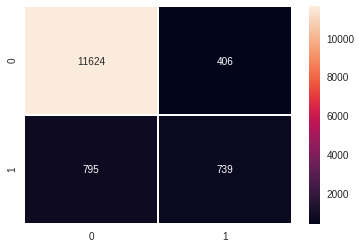

In [155]:
confusion_martix(y_test, xg_classifer_pred)

ROC AUC Curve on XG Boost 

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c4ee38f60>,
       classes=None, macro=True, micro=True, model=None, per_class=True)

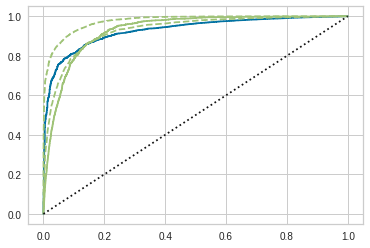

In [156]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

roc = ROCAUC(XGBClassifier(n_estimators=150))
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc

### Best Model

- `After analysing all the ensemble methods, Random Forest and XG Boost clasifiers standout to the best model.`
- `Since both Random Forest and XG Boost classifiers have the highest recall (49%) and accuracy scores( 91% )`

## <a id = "link19"></a> Conclusion Buisness Insights

##### `Confusion matrix means`

**True Positive (observed=1,predicted=1):**

Model predicted that customer will subscribe to the term deposit and the customer subscribed to the term deplosit.

**False Positive (observed=0,predicted=1):**

Model predicted that customer will subscribe to the term deposit and the customer did NOT subscribed to the term deplosit.

**True Negative (observed=0,predicted=0):**

Model predicted that customer will NOT subscribe to the term deposit and the customer did NOT subscribed to the term deplosit.

**False Negative (observed=1,predicted=0):**

Model predicted that customer will NOT subscribe to the term deposit and the customer did subscribed to the term deplosit.

##### `Important Metric`

The objective here is for the bank to predict potential customers who can subscribe to the peterm deposit. Hence the key metrric would be **less number of False Negative**, since if False Negative is high the bank might loose potential customers who are good candidates for subscribing to the term deposit, loosing significant loan intrest renevenue stream . 

Hence **Recall is the most important metric**.

In case of False Positive the bank might  not have the customers end up subscribing to the term deposit , but those customers are very good target audience to make some customized campaign for term deposit. As model predicts that those customers have higher chances of subscribing term deposit.

Hence **F1 Score is secondary  metric**.



### Answer the following questions :

- What do you mean by recall and what information does it provide here?

 **Answer** : Recall is a score that determines how accurately the model predicts True Positives. In this case it identifies the bank how accurately model is going to predict the customers who are going to subscribe to the term deposits.

- Suggest some changes for the organization so that they can increase the number of customers who take term deposit?

 **Answer** : 
  * Engage more with the customer with frequent follow ups with , spend more time with customer marketing the term deposit products.
  * Target the campaign to customer age groups within 30 - 50 years old. Preferrable married customers
  * Schedule the campaigning calls more towards the mid of month (10th - 20th day) to target customers for term deposits

- How much influence does the previous campaign and mode of interaction have on financial performance?

 **Answer** : Significant but not to a very large.

- Which features should be more/less focused by the bank to get better results and why?

 **Answer** :
   * Important features are duration , age , day , poutcome , pdays
   * Less important features are job, contact, month,housing

- What did you learn about banking industries from this data?

 **Answer** : There is a lot of potential for the banks to leverage machine learning on top of their existing customer data and incomming data from marketing and sales group. These data could be used to isolate specific customer groups, behavious and patterns that could significantly incrase the bank's productivity and revenue streams.